fraud cases:  1.0
non fraud cases:  0.9999989042260713


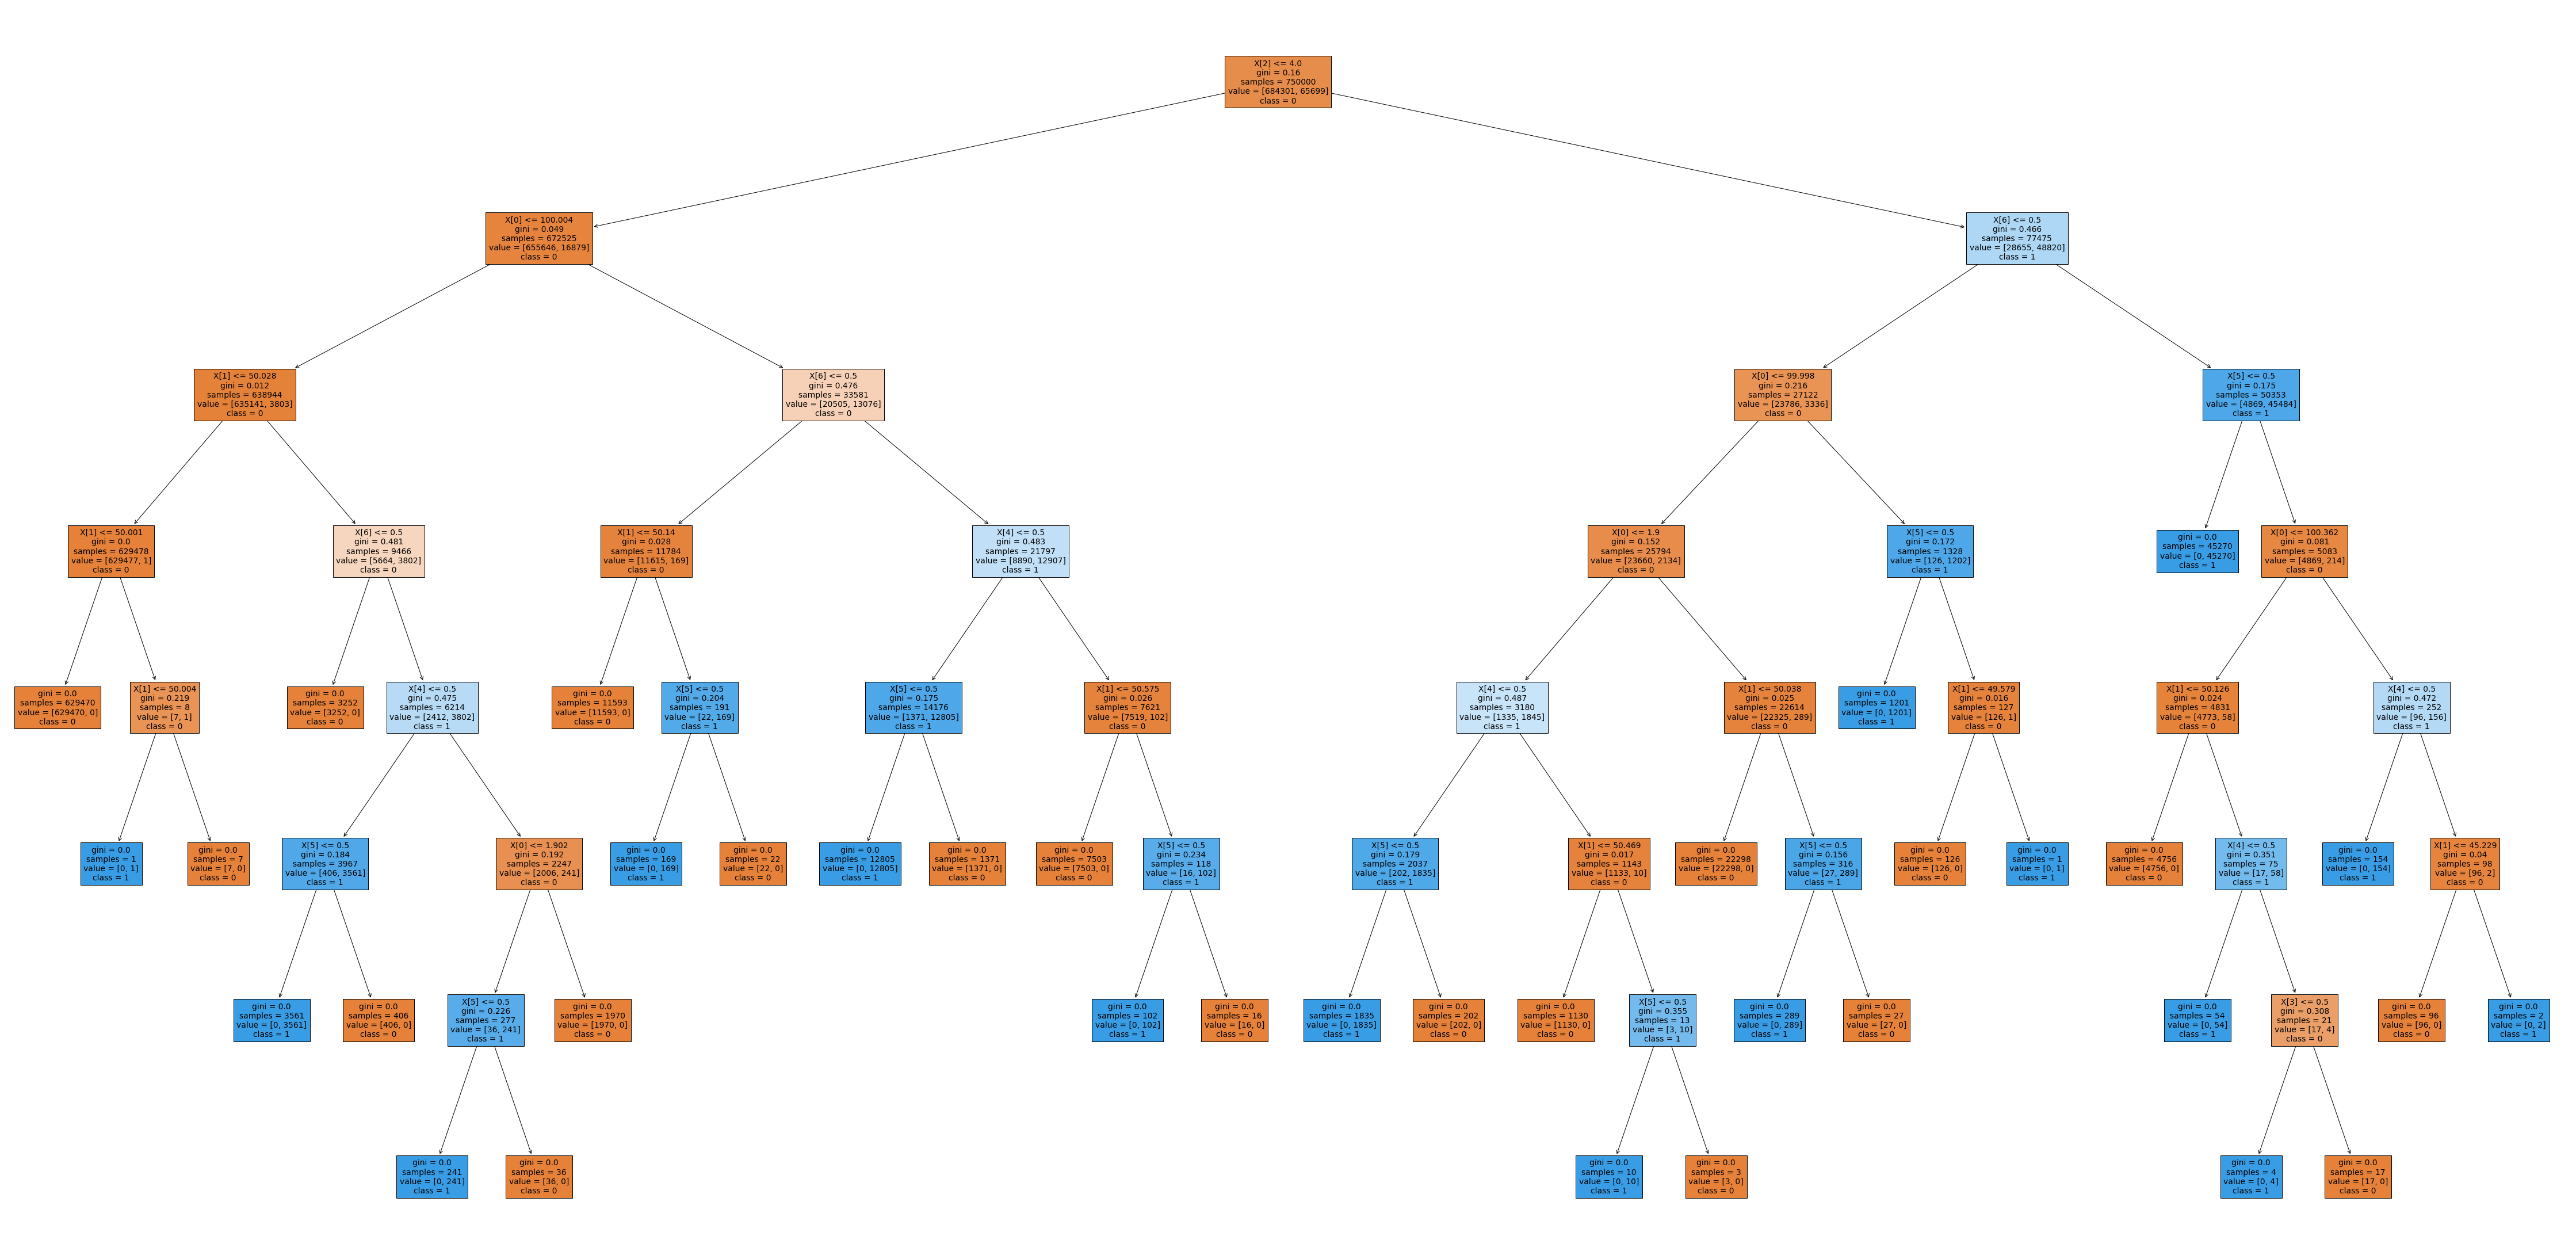

In [6]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
data=pd.read_csv('credit1.csv')
X=data.loc[:,['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']]
y=data.loc[:,['fraud']]

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.25)

model = DecisionTreeClassifier()# Define model
model.fit(X_train, y_train) # Train model

y_predicted = model.predict(X_test) # Prediction
index = data['fraud'] == 1
newx_test = data.loc[index, ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']]
newy_test = data.loc[index, 'fraud']
y_predicted = model.predict(newx_test)
accuracy = accuracy_score(newy_test, y_predicted)

print("fraud cases: ", accuracy) 1

index = data['fraud'] == 0
newx_test = data.loc[index, ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']]
newy_test = data.loc[index, 'fraud']

y_predicted = model.predict(newx_test)
accuracy = accuracy_score(newy_test, y_predicted)

print("non fraud cases: ", accuracy)

fig = plt.figure(figsize=(80,40))
fig = tree.plot_tree(model, class_names=['0','1'], filled=True)
plt.savefig('tree1.pdf')

